In [1]:
# Changing the working directory
import os

os.chdir("C:/Users/kpr16/OneDrive/Documents/Python Working Directory")
# This is a snippet to import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
pd.set_option("display.min_rows", 150)
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

<IPython.core.display.Javascript object>

![IMAGE ALT TEXT HERE](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.truebridgecapital.com%2Fwp-content%2Fuploads%2F2015%2F11%2FairBNB-logo.png&f=1&nofb=1)

# <center> <font color="white"> <font size=60> <B><I> AIRBNB TORONTO LISTINGS ANALYSIS </I></B></font> </center>

In [3]:
listings = pd.read_csv("listings-Toronto.csv")

C:\Users\kpr16\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>

In [4]:
listings.shape

(23004, 106)

<IPython.core.display.Javascript object>

In [8]:
listings = pd.read_csv(
    r"C:\Users\kpr16\OneDrive\Documents\Python\listings-Toronto.csv", low_memory=False
)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20200316134823,2020-03-16,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",All forms of public transportation are easily ...,The whole house and garden are available.,"We will be out of town, but fully accessible b...",This is our much-loved family home. We expect ...,NaN,NaN,https://a0.muscache.com/im/pictures/76206750/d...,NaN,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Toronto, Ontario, Canada","I live in Toronto, Canada with my husband and ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1565/profile_...,https://a0.muscache.com/im/users/1565/profile_...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, ON, Canada",Little Portugal,Little Portugal,NaN,Toronto,ON,M6J,Toronto,"Toronto, Canada",CA,Canada,43.64617,-79.42451,f,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",1400.0,$469.00,"$2,000.00",NaN,"$1,000.00",$150.00,1,$0.00,4,730,4,4,730,730,4.0,730.0,26 months ago,t,0,0,0,0,2020-03-16,7,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.12
1,8077,https://www.airbnb.com/rooms/8077,20200316134823,2020-03-16,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,NaN,NaN,NaN,NaN,No smoking please.,NaN,NaN,https://a0.muscache.com/im/pictures/11780344/1...,NaN,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Toronto, ON, Canada",Downtown Toronto,Waterfront Communities-The Island,NaN,Toronto,ON,M5J,Toronto,"Toronto, Canada",CA,Canada,43.641

<IPython.core.display.Javascript object>

In [9]:
# Check Duplicates in id Column
listings.shape[0] - listings["id"].nunique()

0

<IPython.core.display.Javascript object>

In [10]:
# Check Duplicates in host_id Column
listings.shape[0] - listings["host_id"].nunique()

8256

<IPython.core.display.Javascript object>

In [11]:
# Checking missing values in the dataframe
a = listings.isnull().sum() / listings.shape[0]
a.sort_values(ascending=False)

thumbnail_url                                   1.000000
neighbourhood_group_cleansed                    1.000000
medium_url                                      1.000000
xl_picture_url                                  1.000000
license                                         0.999913
jurisdiction_names                              0.999783
square_feet                                     0.994001
monthly_price                                   0.932620
weekly_price                                    0.920709
notes                                           0.550904
access                                          0.434837
host_about                                      0.430664
interaction                                     0.371544
neighborhood_overview                           0.346201
transit                                         0.341549
house_rules                                     0.325726
space                                           0.279647
host_response_rate             

<IPython.core.display.Javascript object>

In [207]:
final = listings.loc[
    :,
    [
        "id",
        "host_id",
        "host_location",
        "host_neighbourhood",
        "host_listings_count",
        "host_total_listings_count",
        "street",
        "neighbourhood",
        "neighbourhood_cleansed",
        "zipcode",
        "property_type",
        "room_type",
        "accommodates",
        "bathrooms",
        "bedrooms",
        "beds",
        "bed_type",
        "amenities",
        "price",
        "cleaning_fee",
        "guests_included",
        "extra_people",
        "number_of_reviews",
        "first_review",
        "last_review",
        "review_scores_rating",
        "review_scores_accuracy",
        "review_scores_cleanliness",
        "review_scores_checkin",
        "review_scores_communication",
        "review_scores_location",
        "review_scores_value",
        "calculated_host_listings_count",
        "calculated_host_listings_count_entire_homes",
        "calculated_host_listings_count_private_rooms",
        "calculated_host_listings_count_shared_rooms",
        "reviews_per_month",
    ],
]

<IPython.core.display.Javascript object>

In [208]:
final.shape

(23004, 37)

<IPython.core.display.Javascript object>

In [209]:
final["review_scores_rating"].fillna(0, inplace=True)
final["review_scores_accuracy"].fillna(0, inplace=True)
final["review_scores_cleanliness"].fillna(0, inplace=True)
final["review_scores_checkin"].fillna(0, inplace=True)
final["review_scores_communication"].fillna(0, inplace=True)
final["review_scores_location"].fillna(0, inplace=True)
final["review_scores_value"].fillna(0, inplace=True)

<IPython.core.display.Javascript object>

###  <center> <font size= 30> <font color ="orange"> Percentage of listings by neighbourhood  </font> </center>

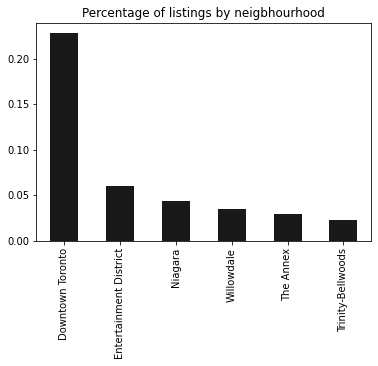

<IPython.core.display.Javascript object>

In [210]:
final["neighbourhood"].value_counts(normalize=True).sort_values(ascending=False).head(
    6
).plot(
    kind="bar",
    color="black",
    alpha=0.9,
    title="Percentage of listings by neigbhourhood",
)

In [211]:
final["price"] = final["price"].str.replace("$", "")
final["price"] = final["price"].str.replace(",", "")
final["price"] = pd.to_numeric(final["price"])

<IPython.core.display.Javascript object>

###  <center> <font size= 30> <font color ="orange"> Top 10 average price by neighbourhood </font> </center>

In [17]:
final.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10)

neighbourhood
Scarborough City Centre    460.054054
South Hill/Rathnelly       388.872727
Toronto Islands            354.400000
Harbourfront               234.129151
Rouge                      231.461538
Saint Andrew/Windfields    226.500000
Corktown                   222.363636
The Kingsway               210.857143
Yorkville                  208.485207
Rosedale                   205.350877
Name: price, dtype: float64

<IPython.core.display.Javascript object>

###  <center> <font size= 30> <font color ="orange"> Bottom 10 average price by neighbourhood  </font> </center>

In [18]:
final.groupby("neighbourhood")["price"].mean().sort_values(ascending=True).head(10)

neighbourhood
West Hill                  48.054054
Eglinton East              55.105263
Malvern                    55.255639
York University Heights    56.945455
Pleasant View              59.447619
Keelesdale                 59.803571
Mount Olive                64.370370
Humber Summit              65.200000
Morningside Heights        65.266667
Tam O'Shanter              67.789474
Name: price, dtype: float64

<IPython.core.display.Javascript object>

In [21]:
final["total_review_score"] = (
    final["review_scores_accuracy"]
    + final["review_scores_cleanliness"]
    + final["review_scores_checkin"]
    + final["review_scores_communication"]
    + final["review_scores_location"]
    + final["review_scores_value"]
) / 6

<IPython.core.display.Javascript object>

In [142]:
Communication = final["review_scores_communication"].value_counts().reset_index()
Accuracy = final["review_scores_accuracy"].value_counts().reset_index()
Cleanliness = final["review_scores_cleanliness"].value_counts().reset_index()
Checkin = final["review_scores_checkin"].value_counts().reset_index()
Location = final["review_scores_location"].value_counts().reset_index()
Value = final["review_scores_value"].value_counts().reset_index()

<IPython.core.display.Javascript object>

In [165]:
avg_review_score = final["total_review_score"].mean()
avg_month_review = final["reviews_per_month"].mean()
popular_listings = final[
    (final["number_of_reviews"] > avg_review_score)
    & (final["reviews_per_month"] > avg_month_review)
]
popular_house = (
    popular_listings[
        [
            "price",
            "property_type",
            "room_type",
            "neighbourhood",
            "host_neighbourhood",
            "accommodates",
            "bathrooms",
            "bedrooms",
            "beds",
            "number_of_reviews",
            "reviews_per_month",
            "total_review_score",
        ]
    ]
    .sort_values(by=["number_of_reviews"], ascending=False)
    .head(2300)
)

<IPython.core.display.Javascript object>

In [146]:
p_h = popular_house.groupby("room_type")["price"].mean().reset_index()
r_t = p_h.iloc[:, 0]
price = p_h.iloc[:, 1]

<IPython.core.display.Javascript object>

###  <center> <font size= 30> <font color ="orange"> Total listing by host type </font> </center>

In [213]:
final.loc[final["calculated_host_listings_count"] <= 5, "host_type"] = "Individual"
final.loc[
    (final["calculated_host_listings_count"] <= 20)
    & (final["calculated_host_listings_count"] > 5),
    "host_type",
] = "Small Scale Companies"
final.loc[
    (final["calculated_host_listings_count"] <= 100)
    & (final["calculated_host_listings_count"] > 20),
    "host_type",
] = "Medium Scale Companies"
final.loc[
    final["calculated_host_listings_count"] > 100, "host_type"
] = "Large Scale Companies"
host_type = final.groupby("host_type").count().id.sort_values(ascending=False)
host_type.reset_index()

,host_type,id
0,Individual,18775
1,Small Scale Companies,2803
2,Medium Scale Companies,1308
3,Large Scale Companies,118


<IPython.core.display.Javascript object>

###  <center> <font size= 30> <font color ="orange"> Average prices by host type </font> </center>

In [214]:
avg_price = final[["host_type", "price"]].groupby("host_type").mean().reset_index()
avg_price

,host_type,price
0,Individual,140.160905
1,Large Scale Companies,501.500000
2,Medium Scale Companies,151.022936
3,Small Scale Companies,142.876918


<IPython.core.display.Javascript object>

###  <center> <font size= 30> <font color ="orange"> Top 10% of the whole data filtered by number of reviews </font> </center>

In [199]:
popular_house

,price,property_type,room_type,neighbourhood,host_neighbourhood,accommodates,bathrooms,bedrooms,beds,number_of_reviews,reviews_per_month,total_review_score
1201,199.0,Apartment,Entire home/apt,Downtown Toronto,Entertainment District,3,1.0,1.0,2.0,818,12.89,10.000000
94,65.0,Townhouse,Private room,Downtown Toronto,Downtown Toronto,3,1.0,1.0,1.0,815,8.40,10.000000
1118,128.0,Condominium,Entire home/apt,Downtown Toronto,Entertainment District,2,1.0,1.0,1.0,702,10.84,10.000000
255,99.0,Condominium,Entire home/apt,Entertainment District,Entertainment District,4,1.0,1.0,1.0,683,7.92,10.000000
389,135.0,Apartment,Entire home/apt,Studio District,Studio District,2,1.0,0.0,1.0,682,8.46,10.000000
5354,52.0,Apartment,Entire home/apt,Dovercourt Park,Dovercourt Park,2,1.0,1.0,1.0,562,13.65,10.000000
2326,80.0,Apartment,Entire home/apt,Riverdale,Studio District,2,1.0,0.0,1.0,560,10.16,10.000000
3848,99.0,Condominium,Entire home/apt,Niagara,Yorkville,2,1.0,0.0,1.0,544,11.57,9.666667
6735,75.0,Guest suite,Entire home/apt,Westmount,Westmount,4,1.0,1.0,1.0,517,15.33,9.833333
309,185.0,Condominium,Entire home/apt,Downtown Toronto,Harbourfront,4,1.0,1.0,2.0,515,6.36,9.166667


<IPython.core.display.Javascript object>

###  <center> <font size= 30> <font color ="orange"> Average price per room type </font> </center>

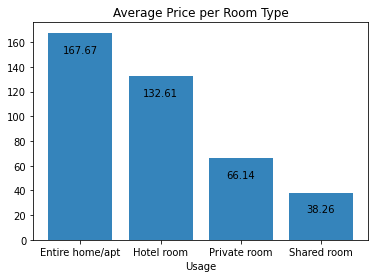

<IPython.core.display.Javascript object>

In [147]:
plt.cla()
plt.bar(r_t, price, align="center", alpha=0.9)
y_pos = np.arange(len(r_t))
plt.xlabel("Usage")
plt.title("Average Price per Room Type")
for x, y in zip(r_t, price):
    label = "{:.2f}".format(y)
    plt.annotate(
        label, (x, y), textcoords="offset points", xytext=(0, -20), ha="center",
    )

## <Center> <font color="orange"> <font size =30> Top 10 Average Number Reviews Neighbourhood by Room Type </font> </Center>

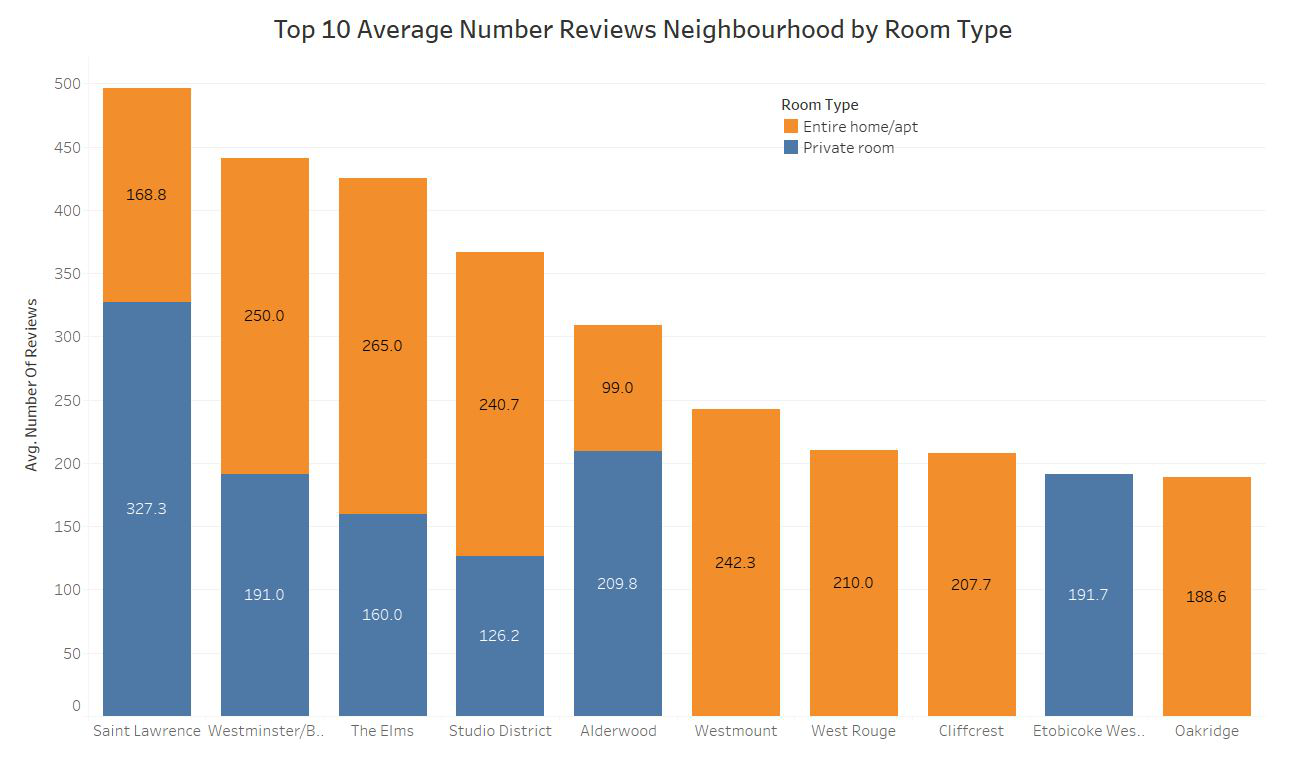

<IPython.core.display.Javascript object>

In [168]:
from PIL import Image

img = Image.open("C:/Users/kpr16/OneDrive/Documents/Python/Pics/Top 10.JPG")
img

## <Center> <font color="orange"> <font size =30>  Top 5 Property Type by number of listings </font> </Center>

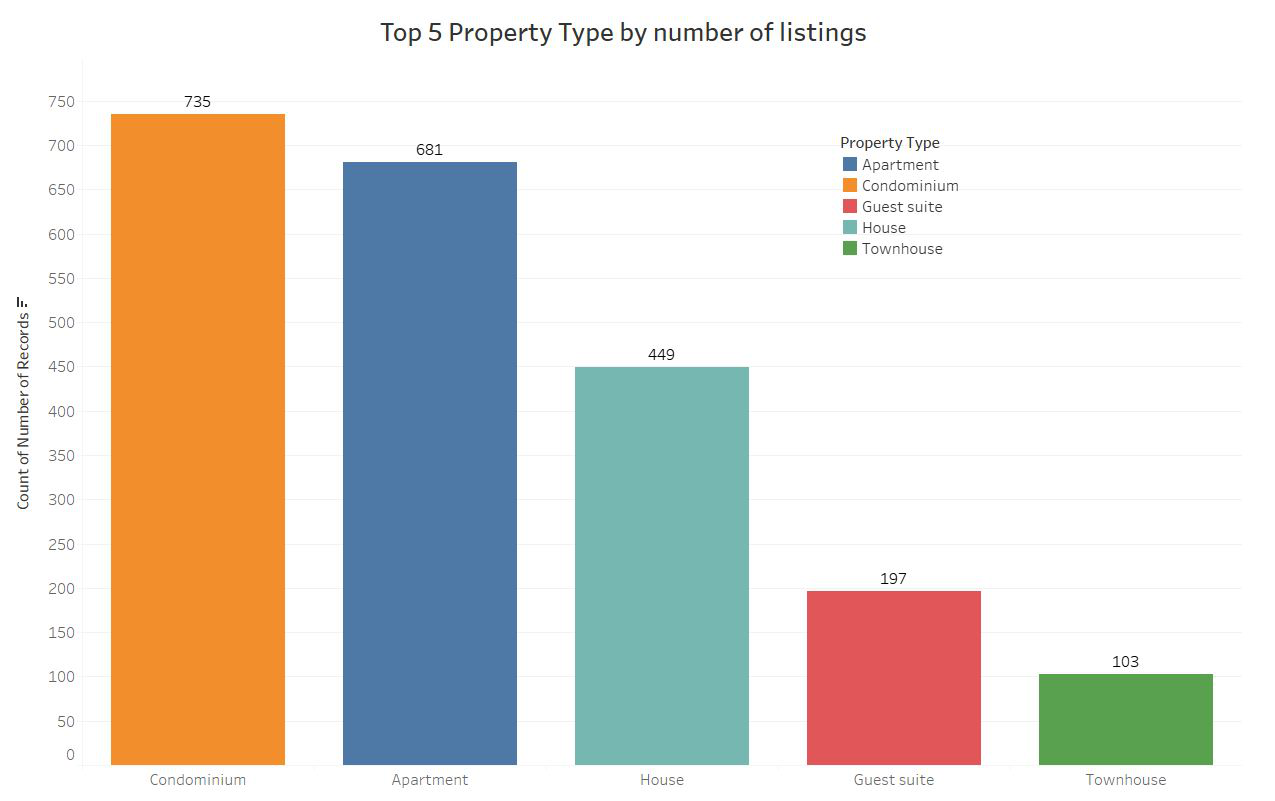

<IPython.core.display.Javascript object>

In [169]:
from PIL import Image

img = Image.open("C:/Users/kpr16/OneDrive/Documents/Python/Pics/Top 5.JPG")
img

## <Center> <font color="orange"> <font size =30>  Number of listings by number of accomodates</font> </Center>

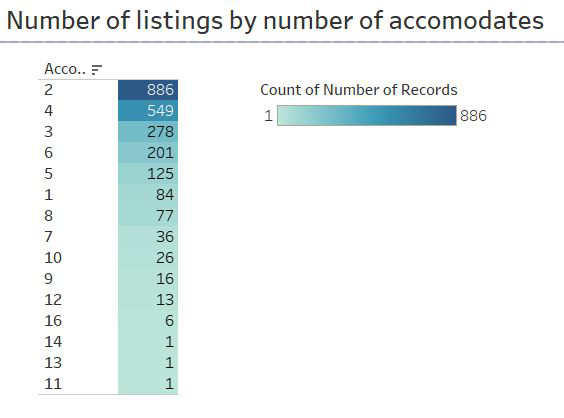

<IPython.core.display.Javascript object>

In [170]:
from PIL import Image

img = Image.open("C:/Users/kpr16/OneDrive/Documents/Python/Pics/Accomodates.JPG")
img

## <Center> <font color="orange"> <font size =30> Top 10 Neighbourhood by listings count</font> </Center>

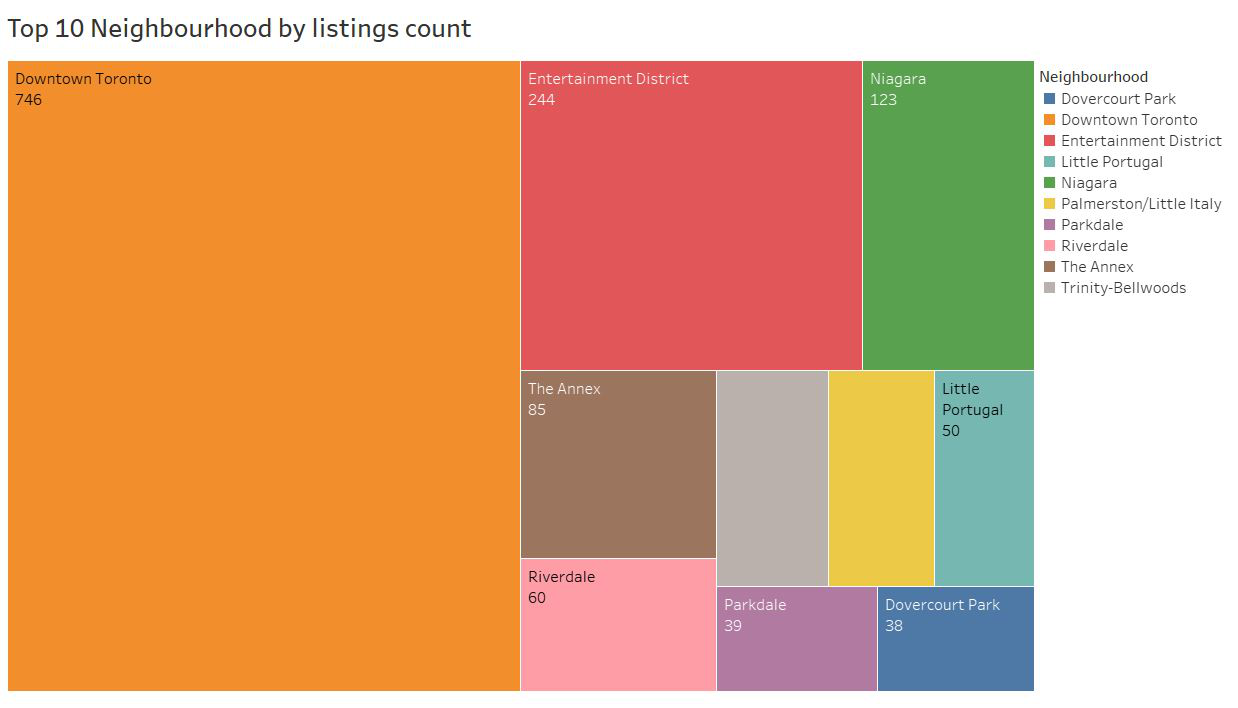

<IPython.core.display.Javascript object>

In [171]:
from PIL import Image

img = Image.open("C:/Users/kpr16/OneDrive/Documents/Python/Pics/Neighbour.JPG")
img

![IMAGE ALT TEXT HERE](https://www.nicepng.com/png/detail/76-764729_thank-you-gold-transparent.png)